In [7]:
import pandas as pd
import sqlite3
import datetime as d

In [2]:
db = sqlite3.connect('/Users/jegankarunakaran/AlgoTrading/code/AlgoTrading/db/ema_rsi_camarilla.db')
c = db.cursor()

In [3]:
#query data for the last X number of days from today. This is used to calculate Exponential Mean Average (EMA)
queryDate = (dt.datetime.today() - dt.timedelta(days=200)).date()
query_daily_price_sql = '''SELECT ticker, close_price from DAILY_PRICE 
    where close_date < "''' + str(queryDate) + '''"'''
c.execute(query_daily_price_sql)
result = c.fetchall()
print(result[0:3])

[('MSFT', 194.075), ('MSFT', 196.16), ('MSFT', 201.175)]


In [4]:
def conversion(tup, dict):
    for x, y in tup:
        dict.setdefault(x, []).append(y)
    return dict

In [5]:
data = {}

In [6]:
final_data = conversion(result, data)

In [9]:
#final_data

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
final_data_df = pd.DataFrame(final_data)

In [12]:
final_data_df

,MSFT,TSLA,FB,NVDA,JPM,V,JNJ,UNH,WMT,BAC,PG
0,194.075,191.950,216.08,91.105,88.590,187.635,133.325,281.605,116.015,22.515,111.045
1,196.160,201.870,220.64,91.555,89.020,189.700,134.690,284.650,116.770,22.755,113.425
2,201.175,215.960,227.07,94.520,89.980,191.385,136.060,289.410,117.375,23.090,115.225
3,202.350,223.925,237.55,94.840,89.290,192.055,135.905,292.385,117.375,22.620,115.680
4,203.890,241.730,233.42,95.655,89.580,193.800,136.600,292.600,116.915,22.660,116.520
...,...,...,...,...,...,...,...,...,...,...,...
218,246.140,629.040,305.97,142.500,159.305,224.920,168.325,418.115,140.315,41.660,135.955
219,245.195,617.200,306.53,142.905,156.705,224.550,166.820,408.720,139.030,41.195,135.265
220,237.995,589.890,302.55,137.435,155.710,219.665,166.180,402.405,135.440,40.810,133.835
221,242.005,571.690,305.26,136.505,159.565,222.975,167.850,405.625,137.735,41.450,136.015


In [14]:
corrMatrix

,MSFT,TSLA,FB,NVDA,JPM,V,JNJ,UNH,WMT,BAC,PG
MSFT,1.000000,0.715764,0.730705,0.731390,0.857020,0.784565,0.855880,0.786469,0.192366,0.876338,0.036791
TSLA,0.715764,1.000000,0.455608,0.699549,0.818631,0.595909,0.834751,0.639253,0.503243,0.737752,0.096221
FB,0.730705,0.455608,1.000000,0.769195,0.590177,0.733005,0.558933,0.785311,0.458644,0.652289,0.542659
NVDA,0.731390,0.699549,0.769195,1.000000,0.621026,0.658319,0.608745,0.675659,0.659495,0.602601,0.554248
JPM,0.857020,0.818631,0.590177,0.621026,1.000000,0.800747,0.898243,0.842728,0.213458,0.979768,-0.025266
V,0.784565,0.595909,0.733005,0.658319,0.800747,1.000000,0.736696,0.829071,0.273004,0.840216,0.201202
JNJ,0.855880,0.834751,0.558933,0.608745,0.898243,0.736696,1.000000,0.755314,0.219265,0.891731,-0.019627
UNH,0.786469,0.639253,0.785311,0.675659,0.842728,0.829071,0.755314,1.000000,0.380699,0.872175,0.317262
WMT,0.192366,0.503243,0.458644,0.659495,0.213458,0.273004,0.219265,0.380699,1.000000,0.136718,0.717893
BAC,0.876338,0.737752,0.652289,0.602601,0.979768,0.840216,0.891731,0.872175,0.136718,1.000000,-0.006594


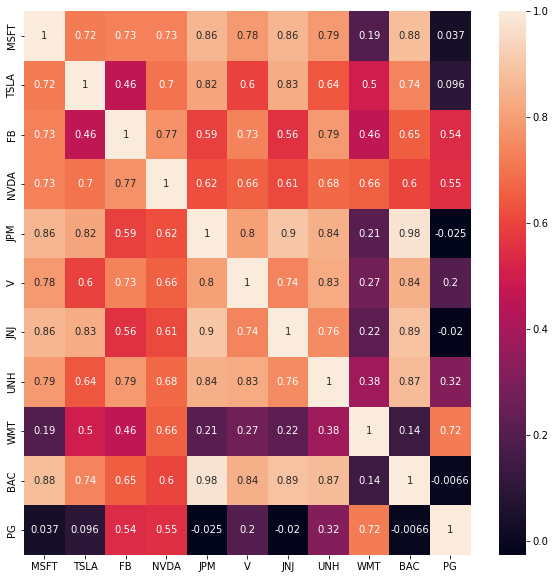

In [13]:
corrMatrix = final_data_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True,ax=ax)
plt.show()